#Logistic Regression

In [3]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt
import utils
grader = utils.Grader()
%matplotlib inline

In [4]:
df = pd.read_csv("ex2data1.txt", names=["score1", "score2", "admitted"])
df.head(5)

,score1,score2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
X = df.iloc[:, 0:2]
Y = df.iloc[:, 2]
print(X.head(5))
print(Y.head(5))

      score1     score2
0  34.623660  78.024693
1  30.286711  43.894998
2  35.847409  72.902198
3  60.182599  86.308552
4  79.032736  75.344376
0    0
1    0
2    0
3    1
4    1
Name: admitted, dtype: int64


In [6]:
pos = df["admitted"] == 1
neg = df["admitted"] == 0
print(pos)

0     False
1     False
2     False
3      True
4      True
      ...  
95     True
96     True
97     True
98     True
99     True
Name: admitted, Length: 100, dtype: bool


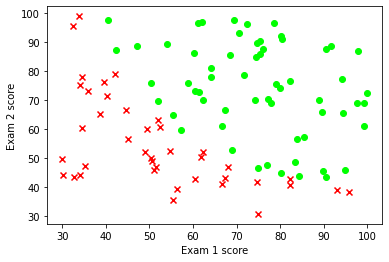

In [7]:
fig = plt.figure()
axes = fig.add_subplot(111)
axes.set_xlabel("Exam 1 score")
axes.set_ylabel("Exam 2 score")
axes.scatter(X[pos].iloc[:,0], X[pos].iloc[:,1], marker="o", c="lime", label = "Admitted")
axes.scatter(X[neg].iloc[:,0], X[neg].iloc[:,1], marker="x", c="red", label = "Not-Admitted")

In [8]:
def sigmoid(z):
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1 / (1 + np.exp(-z))
    return g
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


In [ ]:
# appends the implemented function in part 1 to the grader object
grader[1] = sigmoid

# send the added functions to coursera grader for getting a grade on this part
grader.grade()


Submitting Solutions | Programming Exercise logistic-regression

Use token from last successful submission (deepesh.1905g2@gmail.com)? (Y/n): y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
   Regularized Logistic Regression Gradient |   5 /   5 | Nice work!
                           Sigmoid Function |   0 /  30 | Your answer is incorrect.
                   Logistic Regression Cost |   0 /  30 | Your answer is incorrect.
               Logistic Regression Gradient |   0 /   5 | Your answer is incorrect.
                                    Predict |   0 /  15 | Your answer is incorrect.
       Regularized Logistic Regression Cost |   0 /  15 | Your answer is incorrect.
                                  --------------------------------
                                            |   5 / 100 |  



In [9]:
x = np.array(X)
y = np.array(Y)

In [10]:
x = np.concatenate([np.ones((x.shape[0],1)), x], axis=1)
print(x[:4])

[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]]


In [11]:
def costFunction(theta, x, y):
    m = y.size
    J = 0
    grad = np.zeros(theta.shape)
    h = sigmoid(np.dot(x, theta))
    pos_cost = np.dot(-y, np.log(h))
    neg_cost = np.dot((1-y), np.log(1-h))
    J = (np.sum(pos_cost-neg_cost))/m
    grad = (h-y).dot(x)/m
    return J, grad
# Initialize fitting parameters
initial_theta = np.zeros(x.shape[1])

cost, grad = costFunction(initial_theta, x, y)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693\n')

print('Gradient at initial theta (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Expected gradients (approx):\n\t[-0.1000, -12.0092, -11.2628]\n')

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, x, y)

print('Cost at test theta: {:.3f}'.format(cost))
print('Expected cost (approx): 0.218\n')

print('Gradient at test theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Expected gradients (approx):\n\t[0.043, 2.566, 2.647]')

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial theta (zeros):
	[-0.1000, -12.0092, -11.2628]
Expected gradients (approx):
	[-0.1000, -12.0092, -11.2628]

Cost at test theta: 0.218
Expected cost (approx): 0.218

Gradient at test theta:
	[0.043, 2.566, 2.647]
Expected gradients (approx):
	[0.043, 2.566, 2.647]


In [ ]:
grader[2] = costFunction
grader[3] = costFunction
grader.grade()


Submitting Solutions | Programming Exercise logistic-regression

Use token from last successful submission (deepesh.1905g2@gmail.com)? (Y/n): y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
   Regularized Logistic Regression Gradient |   5 /   5 | Nice work!
                           Sigmoid Function |  30 /  30 | Nice work!
                   Logistic Regression Cost |  30 /  30 | Nice work!
               Logistic Regression Gradient |   0 /   5 | Your answer is incorrect.
                                    Predict |   0 /  15 | Your answer is incorrect.
       Regularized Logistic Regression Cost |   0 /  15 | Your answer is incorrect.
                                  --------------------------------
                                            |  65 / 100 |  



In [12]:
options = {"maxiter": 1000}

res = opt.minimize(costFunction, initial_theta, (x, y), jac = True, method="TNC", options = options)
cost = res.fun

# the optimized theta is in the x property
theta = res.x

# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')


Cost at theta found by optimize.minimize: 0.203
Expected cost (approx): 0.203

theta:
	[-25.161, 0.206, 0.201]
Expected theta (approx):
	[-25.161, 0.206, 0.201]


[ 30 100]
[94.17893979 22.52507222]


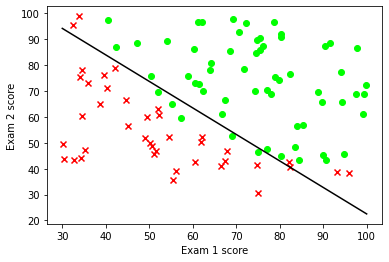

In [13]:
decisionBoundary1 = []
x_value= np.array([30, 100])
print(x_value)

'''
    if h(theta*x) == 0.5 when e^-(z) == 1 => z==0
    z = theta[0]*x[0] + theta[1]*x[1] + theta[2]*x[2] = 0
    take random values of x1 and get x2
    x2 = (-theta[0] - theta[1]*x[1])/theta[2]
'''

y_value=(-1. / theta[2]) * (theta[1] * x_value + theta[0])
print(y_value)
fig = plt.figure()
axes = fig.add_subplot(111)
axes.set_xlabel("Exam 1 score")
axes.set_ylabel("Exam 2 score")
axes.scatter(X[pos].iloc[:,0], X[pos].iloc[:,1], marker="o", c="lime", label = "Admitted")
axes.scatter(X[neg].iloc[:,0], X[neg].iloc[:,1], marker="x", c="red", label = "Not-Admitted")
axes.plot(x_value, y_value, color="black")

In [14]:
def predict(theta, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression.
    Computes the predictions for X using a threshold at 0.5 
    (i.e., if sigmoid(theta.T*x) >= 0.5, predict 1)
    
    Parameters
    ----------
    theta : array_like
        Parameters for logistic regression. A vecotor of shape (n+1, ).
    
    X : array_like
        The data to use for computing predictions. The rows is the number 
        of points to compute predictions, and columns is the number of
        features.

    Returns
    -------
    p : array_like
        Predictions and 0 or 1 for each row in X. 
    
    Instructions
    ------------
    Complete the following code to make predictions using your learned 
    logistic regression parameters.You should set p to a vector of 0's and 1's    
    """
    m = X.shape[0] # Number of training examples

    # You need to return the following variables correctly
    p = np.zeros(m)
    p = sigmoid(X.dot(theta))>=0.5
    return p
#  Predict probability for a student with score 45 on exam 1 
#  and score 85 on exam 2 
prob = sigmoid(np.dot([1, 45, 85], theta))
print('For a student with scores 45 and 85,'
      'we predict an admission probability of {:.3f}'.format(prob))
print('Expected value: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, x)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))
print('Expected accuracy (approx): 89.00 %')

For a student with scores 45 and 85,we predict an admission probability of 0.776
Expected value: 0.775 +/- 0.002

Train Accuracy: 89.00 %
Expected accuracy (approx): 89.00 %


In [ ]:
grader[4] = predict
grader.grade()



Submitting Solutions | Programming Exercise logistic-regression

Use token from last successful submission (deepesh.1905g2@gmail.com)? (Y/n): y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
   Regularized Logistic Regression Gradient |   5 /   5 | Nice work!
                           Sigmoid Function |  30 /  30 | Nice work!
                   Logistic Regression Cost |  30 /  30 | Nice work!
               Logistic Regression Gradient |   5 /   5 | Nice work!
                                    Predict |   0 /  15 | Your answer is incorrect.
       Regularized Logistic Regression Cost |   0 /  15 | Your answer is incorrect.
                                  --------------------------------
                                            |  70 / 100 |  



#Regularized logistic regression

In [23]:
df = pd.read_csv("ex2data2.txt", names=["test1", "test2", "result"])
df.head(5)
X = df.iloc[:, :2]
y = df.iloc[:, 2]

In [24]:
pos = y==1
neg = y==0

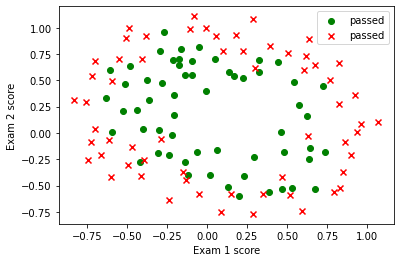

In [25]:
fig = plt.figure()
axes = fig.add_subplot(111)
axes.set_xlabel("Exam 1 score")
axes.set_ylabel("Exam 2 score")
axes.scatter(X.loc[pos, "test1"], X.loc[pos, "test2"], marker="o", color="green", label = "passed")
axes.scatter(X.loc[neg, "test1"], X.loc[neg, "test2"], marker="x", color="red", label = "passed")
axes.set_xlabel="Test-1 Score"
axes.set_ylabel="Test-2 Score"
axes.legend()

In [26]:
def mapFeature(X1, X2, degree=6):
    out = [np.ones(X1.shape[0])]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((X1 ** (i - j)) * (X2 ** j))
    return np.stack(out, axis=1)
print(X.shape)
X = utils.mapFeature(X.iloc[:, 0], X.iloc[:, 0])
print(X)

(118, 2)
[[ 1.00000000e+00  5.12670000e-02  5.12670000e-02 ...  1.81563032e-08
   1.81563032e-08  1.81563032e-08]
 [ 1.00000000e+00 -9.27420000e-02 -9.27420000e-02 ...  6.36295342e-07
   6.36295342e-07  6.36295342e-07]
 [ 1.00000000e+00 -2.13710000e-01 -2.13710000e-01 ...  9.52684426e-05
   9.52684426e-05  9.52684426e-05]
 ...
 [ 1.00000000e+00 -4.84450000e-01 -4.84450000e-01 ...  1.29268813e-02
   1.29268813e-02  1.29268813e-02]
 [ 1.00000000e+00 -6.33640000e-03 -6.33640000e-03 ...  6.47225339e-14
   6.47225339e-14  6.47225339e-14]
 [ 1.00000000e+00  6.32650000e-01  6.32650000e-01 ...  6.41181634e-02
   6.41181634e-02  6.41181634e-02]]


In [27]:
def costFunctionReg(theta, x, y, lam):
    m = x.shape[0]
    h = sigmoid(np.dot(x,theta))
    first = ((-y)*np.log(h))
    second = (1-y)*(np.log(1-(h)))
    error = first - second
    theta_reg = theta
    theta_reg[0] = 0
    J = ((1/m)*sum(error)) + (lam/(2*m))*np.sum(np.dot(theta[1:].T,theta_reg[1:]))
    grad = np.array((1/m)*np.dot(x.transpose(),(h-y))) + (lam/m)*theta_reg
    return J, grad
    
initial_theta = np.zeros(X.shape[1])
lambda_ = 1

cost, grad = costFunctionReg(initial_theta, X, y, lambda_)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx)       : 0.693\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]\n')

test_theta = np.ones(X.shape[1])
cost, grad = costFunctionReg(test_theta, X, y, 10)

print('------------------------------\n')
print('Cost at test theta    : {:.2f}'.format(cost))
print('Expected cost (approx): 3.16\n')

print('Gradient at test theta - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]')

Cost at initial theta (zeros): 0.693
Expected cost (approx)       : 0.693

Gradient at initial theta (zeros) - first five values only:
	[0.0085, 0.0188, 0.0188, 0.0503, 0.0503]
Expected gradients (approx) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]

------------------------------

Cost at test theta    : inf
Expected cost (approx): 3.16

Gradient at test theta - first five values only:
	[0.3001, 0.1882, 0.1882, 0.2255, 0.2255]
Expected gradients (approx) - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [ ]:
grader[5] = costFunctionReg
grader[6] = costFunctionReg
grader.grade()


Submitting Solutions | Programming Exercise logistic-regression

Use token from last successful submission (deepesh.1905g2@gmail.com)? (Y/n): n
Login (email address): deepesh.1905g2@gmail.com
Token: wyw5VghBp1Pwma9S
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
   Regularized Logistic Regression Gradient |   5 /   5 | Nice work!
                           Sigmoid Function |  30 /  30 | Nice work!
                   Logistic Regression Cost |  30 /  30 | Nice work!
               Logistic Regression Gradient |   5 /   5 | Nice work!
                                    Predict |  15 /  15 | Nice work!
       Regularized Logistic Regression Cost |  15 /  15 | Nice work!
                                  --------------------------------
                                            | 100 / 100 |  



In [18]:
def plotData(X, y):
    pos = y[1] == 1
    neg = y[1] == 0
    plt.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    plt.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)

In [20]:
def plotDecisionBoundary(plotData, theta, X, y):
    # make sure theta is a numpy array
    theta = np.array(theta)

    # Plot Data (remember first column in X is the intercept)
    plotData(X[:, 1:3], y)

    if X.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calculate the decision boundary line
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        # Plot, and adjust axes for better viewing
        plt.plot(plot_x, plot_y)

        # Legend, specific for the exercise
        plt.legend(['Admitted', 'Not admitted', 'Decision Boundary'])
        plt.xlim([30, 100])
        plt.ylim([30, 100])
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evaluate z = theta*x over the grid
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)

        z = z.T  # important to transpose z before calling contour
        # print(z)

        # Plot z = 0
        plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        plt.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)

/content/utils.py:45: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(out)


Train Accuracy: 55.1 %
Expected accuracy (with lambda = 1): 83.1 % (approx)



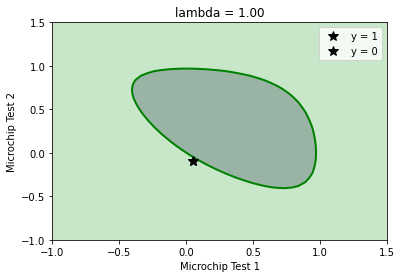

In [28]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1 (you should vary this)
lambda_ = 1

# set options for optimize.minimize
options= {'maxiter': 100}

res = opt.minimize(costFunctionReg,
                        initial_theta,
                        (X, y, lambda_),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of OptimizeResult object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property of the result
theta = res.x

utils.plotDecisionBoundary(plotData, theta, X, y)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 1', 'y = 0'])
plt.grid(False)
plt.title('lambda = %0.2f' % lambda_)

# Compute accuracy on our training set
p = predict(theta, X)

print('Train Accuracy: %.1f %%' % (np.mean(p == y) * 100))
print('Expected accuracy (with lambda = 1): 83.1 % (approx)\n')